# Model Training and Evaluation

In [4]:
# Data Manipulation and Visualization
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow/Keras for deep learning
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Data
from tensorflow.keras.datasets import mnist


## Load and Explore Data

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print("Dataset shapes:")
print(f"Training images: {x_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test images: {x_test.shape}")
print(f"Test labels: {y_test.shape}")

Dataset shapes:
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


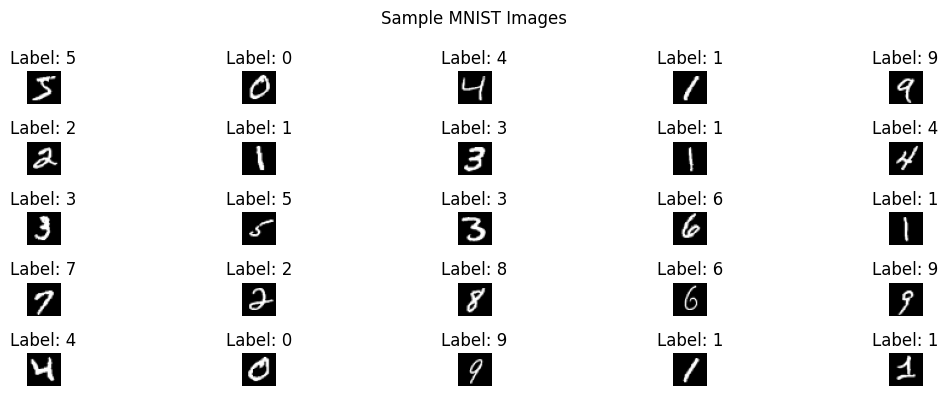

In [12]:
plt.figure(figsize=(12, 4))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()

## Preprocessing

In [18]:
X_train_normalized =  x_train/255
X_test_normalized = x_test/255

x_train_cnn = X_train_normalized.reshape(-1, 28, 28, 1)
x_test_cnn = X_test_normalized.reshape(-1, 28, 28, 1)

y_train_encoded = to_categorical(y_train,10)
y_test_encoded = to_categorical(y_test,10)


In [19]:
print("\nAfter preprocessing:")
print(f"Training images shape: {x_train_cnn.shape}")
print(f"Training labels shape: {y_train_encoded.shape}")
print(f"Pixel values range: {x_train_cnn.min()} to {x_train_cnn.max()}")


After preprocessing:
Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Pixel values range: 0.0 to 1.0


In [22]:
print("\nLabel distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Digit {label}: {count} samples")


Label distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


## Train the CNN

In [24]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

model.fit(
    x_train_cnn,
    y_train_encoded,
    epochs=5,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5


2025-09-05 10:50:16.380984: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9320 - loss: 0.2179 - val_accuracy: 0.9727 - val_loss: 0.0882
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9781 - loss: 0.0732 - val_accuracy: 0.9797 - val_loss: 0.0698
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 0.9827 - val_loss: 0.0610
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9850 - val_loss: 0.0508
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9841 - val_loss: 0.0574


In [30]:
predictions = model.predict(x_test_cnn)
model.evaluate(x_test_cnn, y_test_encoded)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9866 - loss: 0.0524


[0.05238489806652069, 0.9865999817848206]

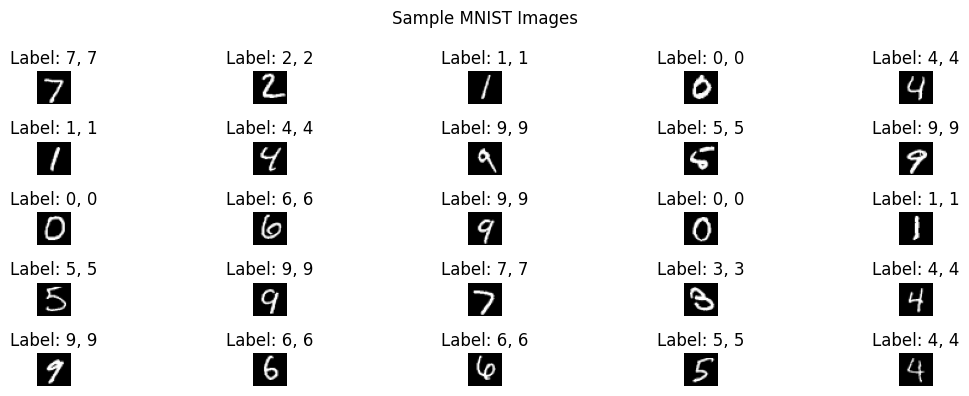

In [35]:
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(12, 4))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test_cnn[i], cmap='gray')
    plt.title(f'Label: {y_test[i]}, {predicted_classes[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()

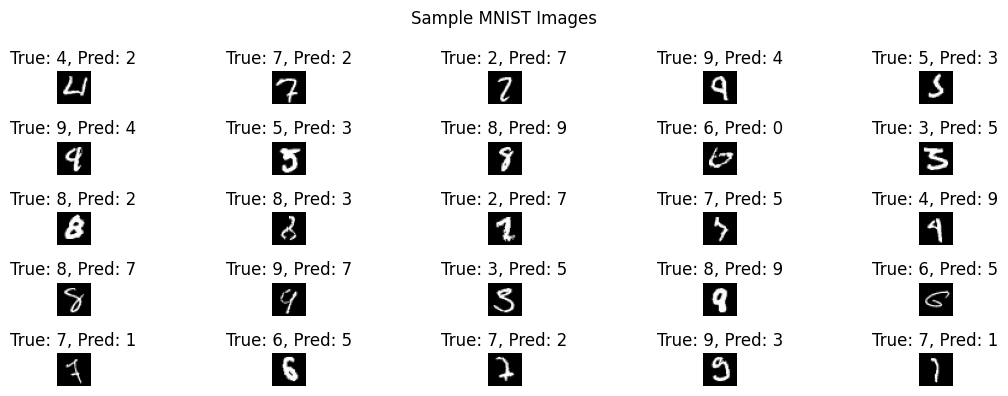

In [42]:
misclassified_idx = np.where(predicted_classes != y_test)[0]
plt.figure(figsize=(12, 4))
for i,idx in enumerate(misclassified_idx[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis("off")

plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()

## Save the Model

In [46]:
model.save("../models/mnist_cnn.keras")